In [246]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
import warnings
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_pickle('News_train_df.pkl')
X_train.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,65.73,7.6,9.10,8.5,9.41,166,7.375000,8.91,1140,786,...,0.000000,0.000000,0.054647,0.000000,0.000000,0.053810,0.0,0.036393,0.061541,0.0
1,48.27,14.3,12.37,18.6,9.88,113,21.666667,15.97,869,561,...,0.067625,0.072737,0.113305,0.000000,0.068093,0.055785,0.0,0.000000,0.000000,0.0
2,56.59,11.1,10.80,13.3,8.72,128,20.333333,12.62,1111,737,...,0.000000,0.000000,0.000000,0.064856,0.000000,0.000000,0.0,0.029929,0.202445,0.0
3,78.79,6.7,5.80,7.2,6.68,103,7.666667,8.35,1445,1141,...,0.000000,0.036497,0.028426,0.000000,0.000000,0.000000,0.0,0.132515,0.000000,0.0
4,47.22,12.6,12.89,15.5,9.10,163,16.250000,13.33,1304,838,...,0.049497,0.000000,0.041466,0.000000,0.000000,0.040831,0.0,0.027615,0.000000,0.0


In [270]:
'X_train.drop("clean_text", inplace = True, axis = 1)'
X_train.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,65.73,7.6,9.10,8.5,9.41,166,7.375000,8.91,1140,786,...,0.000000,0.000000,0.054647,0.000000,0.000000,0.053810,0.0,0.036393,0.061541,0.0
1,48.27,14.3,12.37,18.6,9.88,113,21.666667,15.97,869,561,...,0.067625,0.072737,0.113305,0.000000,0.068093,0.055785,0.0,0.000000,0.000000,0.0
2,56.59,11.1,10.80,13.3,8.72,128,20.333333,12.62,1111,737,...,0.000000,0.000000,0.000000,0.064856,0.000000,0.000000,0.0,0.029929,0.202445,0.0
3,78.79,6.7,5.80,7.2,6.68,103,7.666667,8.35,1445,1141,...,0.000000,0.036497,0.028426,0.000000,0.000000,0.000000,0.0,0.132515,0.000000,0.0
4,47.22,12.6,12.89,15.5,9.10,163,16.250000,13.33,1304,838,...,0.049497,0.000000,0.041466,0.000000,0.000000,0.040831,0.0,0.027615,0.000000,0.0


In [4]:
X_test = pd.read_pickle('News_test_df.pkl')
X_test.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,69.11,8.3,9.28,10.5,8.55,89,8.166667,10.38,759,533,...,0.000000,0.0,0.037984,0.0,0.00000,0.000000,0.000000,0.050592,0.0,0.000000
1,63.73,10.4,10.33,13.6,8.61,213,13.750000,12.83,1908,1338,...,0.064104,0.0,0.000000,0.0,0.00000,0.343723,0.000000,0.000000,0.0,0.000000
2,55.44,9.5,14.38,13.3,12.44,18,11.250000,12.67,103,63,...,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3,57.71,10.7,10.56,13.0,8.98,287,14.000000,11.81,2252,1508,...,0.000000,0.0,0.094228,0.0,0.00000,0.139177,0.060806,0.219631,0.0,0.133949
4,41.33,14.9,13.47,18.5,9.98,204,36.000000,16.68,1469,892,...,0.000000,0.0,0.000000,0.0,0.03899,0.000000,0.041867,0.000000,0.0,0.000000


In [5]:
X_test.drop('clean_text', inplace = True, axis = 1)
X_test.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,69.11,8.3,9.28,10.5,8.55,89,8.166667,10.38,759,533,...,0.000000,0.0,0.037984,0.0,0.00000,0.000000,0.000000,0.050592,0.0,0.000000
1,63.73,10.4,10.33,13.6,8.61,213,13.750000,12.83,1908,1338,...,0.064104,0.0,0.000000,0.0,0.00000,0.343723,0.000000,0.000000,0.0,0.000000
2,55.44,9.5,14.38,13.3,12.44,18,11.250000,12.67,103,63,...,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3,57.71,10.7,10.56,13.0,8.98,287,14.000000,11.81,2252,1508,...,0.000000,0.0,0.094228,0.0,0.00000,0.139177,0.060806,0.219631,0.0,0.133949
4,41.33,14.9,13.47,18.5,9.98,204,36.000000,16.68,1469,892,...,0.000000,0.0,0.000000,0.0,0.03899,0.000000,0.041867,0.000000,0.0,0.000000


In [6]:
y_train = pd.read_pickle('y_train.pkl')
y_train.head()

0    1
1    1
2    1
3    0
4    1
Name: real, dtype: int64

In [7]:
y_test = pd.read_pickle('y_test.pkl')
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: real, dtype: int64

In [8]:
'''I will start with a basic logistic regression, a classic for binary classification tasks'''

'I will start with a basic logistic regression, a classic for binary classification tasks'

In [9]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,0.942761,-1.282372,-1.252542,-1.546857,-0.082368,0.901283,-1.397755,-1.335807,0.499583,0.556509,...,-0.291893,-0.253529,1.034505,-0.186961,-0.287631,0.783464,-0.254653,0.024086,1.222872,-0.203004
1,-0.646595,1.355058,0.486172,1.680740,0.351347,0.256698,1.479458,1.414851,0.159529,0.136614,...,1.829911,2.168789,2.548196,-0.186961,1.968665,0.826040,-0.254653,-0.667435,-0.307607,-0.203004
2,0.110762,0.095390,-0.348623,-0.012950,-0.719098,0.439128,1.211030,0.109652,0.463193,0.465065,...,-0.291893,-0.253529,-0.375700,1.394514,-0.287631,-0.376894,-0.254653,-0.098733,4.727008,-0.203004
3,2.131592,-1.636654,-3.007208,-1.962290,-2.601605,0.135078,-1.339036,-1.553990,0.882299,1.219010,...,-0.291893,0.961914,0.357859,-0.186961,-0.287631,-0.376894,-0.254653,1.850568,-0.307607,-0.203004
4,-0.742175,0.685859,0.762665,0.690091,-0.368435,0.864797,0.388969,0.386276,0.705371,0.653551,...,1.261139,-0.253529,0.694357,-0.186961,-0.287631,0.503581,-0.254653,-0.142712,-0.307607,-0.203004


In [10]:
start_time = time.time()
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.706093788146973 seconds ---


In [11]:
print("score on test: " + str(lr.score(X_test_scaled, y_test)))
print("score on train: "+ str(lr.score(X_train_scaled, y_train)))

score on test: 0.9226674409601239
score on train: 0.9290853363445717


In [12]:
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_train_lr = lr.predict(X_train_scaled)


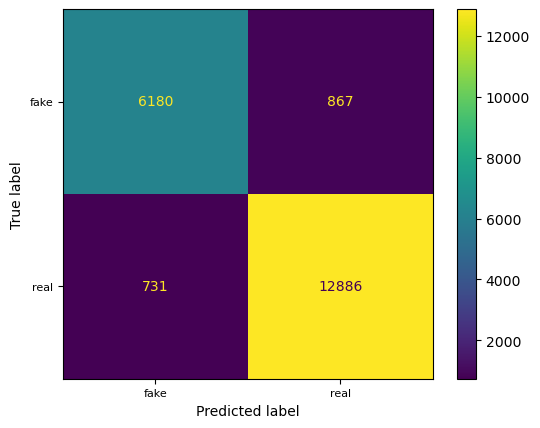

In [13]:
cm = confusion_matrix(y_test, y_pred_test_lr, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [271]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7047
           1       0.94      0.95      0.94     13617

    accuracy                           0.92     20664
   macro avg       0.92      0.91      0.91     20664
weighted avg       0.92      0.92      0.92     20664



In [15]:
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     21139
           1       0.94      0.95      0.95     40851

    accuracy                           0.93     61990
   macro avg       0.92      0.92      0.92     61990
weighted avg       0.93      0.93      0.93     61990



In [16]:
"Code adapted from https://forecastegy.com/posts/feature-importance-in-logistic-regression/#feature-importance-in-binary-logistic-regression"

'Code adapted from https://forecastegy.com/posts/feature-importance-in-logistic-regression/#feature-importance-in-binary-logistic-regression'

In [17]:
coefficients = lr.coef_[0]

In [18]:
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head(50)

,Feature,Importance
1,fk_score,4.273865
3,ari_score,2.718142
12,letter_count,2.624555
0,fe_score,2.557415
5,dw_score,2.072366
387,TFIDF_reuters,1.464183
2,cl_score,1.443879
9,word_count,1.189155
13,polysyllab_count,1.070728
14,monosyllab_count,1.027846


In [19]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [20]:
clf = GridSearchCV(lr,                  
                   param_grid = parameters,   
                   scoring='accuracy',       
                   cv=3) 

In [21]:
start_time = time.time()
clf.fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 21666.266288280487 seconds ---


In [22]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9271011583193545


In [23]:
clf_lr = LogisticRegression(C = 1000, 
                            penalty = 'l2', 
                            solver = 'newton-cg')

In [25]:
clf_lr.fit(X_train_scaled,y_train)
y_pred_clf_lr = clf_lr.predict(X_test_scaled)
print("Accuracy:",clf_lr.score(X_test_scaled, y_test))

Accuracy: 0.924506387921022


In [28]:
y_pred_test_clf_lr = clf_lr.predict(X_test_scaled)
y_pred_train_clf_lr = clf_lr.predict(X_train_scaled)

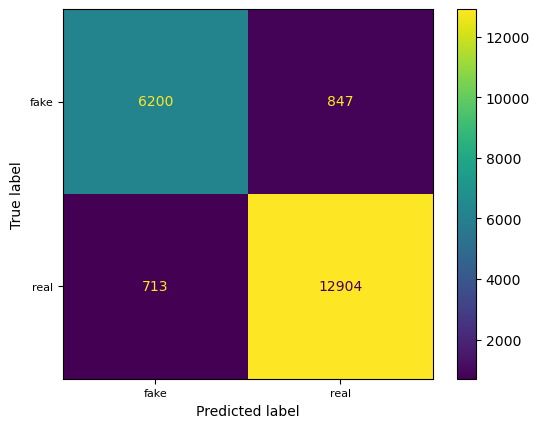

In [29]:
cm = confusion_matrix(y_test, y_pred_test_clf_lr, labels = clf_lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [31]:
coefficients = clf_lr.coef_[0]

In [266]:
feature_importance = pd.DataFrame({'Feature': X_test_scaled.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.reset_index(drop = True, inplace = True)
feature_importance['Rank'] = feature_importance.index+1
feature_importance = feature_importance[['Rank','Feature','Importance']]
feature_importance.head(50)

,Rank,Feature,Importance
0,1,letter_count,58.143093
1,2,char_count,46.672348
2,3,word_count,45.168407
3,4,syllable_count,22.765878
4,5,monosyllab_count,14.649621
5,6,dw_score,2.231395
6,7,polysyllab_count,2.136388
7,8,fk_score,1.952707
8,9,TFIDF_reuters,1.474621
9,10,ari_score,1.181026


In [35]:
print(classification_report(y_test, y_pred_test_clf_lr))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7047
           1       0.94      0.95      0.94     13617

    accuracy                           0.92     20664
   macro avg       0.92      0.91      0.92     20664
weighted avg       0.92      0.92      0.92     20664



In [36]:
print(classification_report(y_train, y_pred_train_clf_lr))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     21139
           1       0.94      0.95      0.95     40851

    accuracy                           0.93     61990
   macro avg       0.93      0.92      0.92     61990
weighted avg       0.93      0.93      0.93     61990



In [200]:
y_pred_proba_lr = clf_lr.predict_proba(X_test_scaled)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)

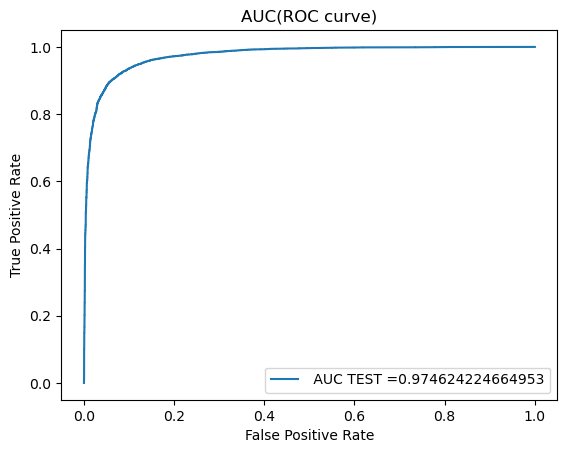

In [216]:
plt.plot(fpr_lr, tpr_lr, label=" AUC TEST ="+str(auc(fpr_lr, tpr_lr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [37]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("score on test: " + str(gnb.score(X_test, y_test)))
print("score on train: "+ str(gnb.score(X_train, y_train)))

score on test: 0.8058943089430894
score on train: 0.8110824326504275


In [ ]:
'I do not think I will investigate this further'

In [38]:
start_time = time.time()
rf = RandomForestClassifier(random_state = 1701)
rf.fit(X_train_scaled, y_train)
print("score on test: " + str(rf.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf.score(X_train_scaled, y_train)))
print("--- %s seconds ---" % (time.time() - start_time))

score on test: 0.9217963608207511
score on train: 1.0
--- 80.68379521369934 seconds ---


In [39]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1701,
 'verbose': 0,
 'warm_start': False}

In [42]:
random_grid = {'bootstrap': [True, False],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'random_state': [1701]}

In [ ]:
'''Max depth 3, 5, 7, 10, None
Min Samples Leaf 5, 10, 50, 100
Don't use samples split
n_estimators number of trees 100 (trial) then 2000
criterion/max features only when need to be too precise
Tends to win with these parameters
''' 

In [43]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose = 3, 
                               cv = 3, n_jobs = -1, random_state=1701)

In [45]:
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 200, 400, 600,
                                                         800, 1000, 1200, 1400,
                                                         1600, 1800, 2000],
                                        'random_state': [1701]},
                   random_state=1701, verbose=3)

In [46]:
rf_random.best_params_


{'random_state': 1701,
 'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': False}

In [47]:
rf_random_best = RandomForestClassifier(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', 
                                        max_depth =50, criterion = 'entropy', bootstrap = False, random_state = 1701)

In [51]:
rf_random_best.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50,
                       max_features='auto', n_estimators=1600,
                       random_state=1701)

In [52]:
print("score on test: " + str(rf_random_best.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_random_best.score(X_train_scaled, y_train)))


score on test: 0.9279907084785134
score on train: 1.0


In [54]:
'''param_grid = {
    'bootstrap': [False],
    'max_depth': [30,40,50,60,70],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [1400, 1600, 1800]
    'criterion': ['entropy']
    'random_state':1701}
'''

"param_grid = {\n    'bootstrap': [False],\n    'max_depth': [30,40,50,60,70],\n    'max_features': ['auto'],\n    'min_samples_leaf': [1, 2, 3],\n    'min_samples_split': [1, 2, 3],\n    'n_estimators': [1400, 1600, 1800]\n    'criterion': ['entropy']\n    'random_state':1701}\n"

In [116]:
y_pred_test_clf_rf = rf_random_best.predict(X_test_scaled)
y_pred_train_clf_rf = rf_random_best.predict(X_train_scaled)

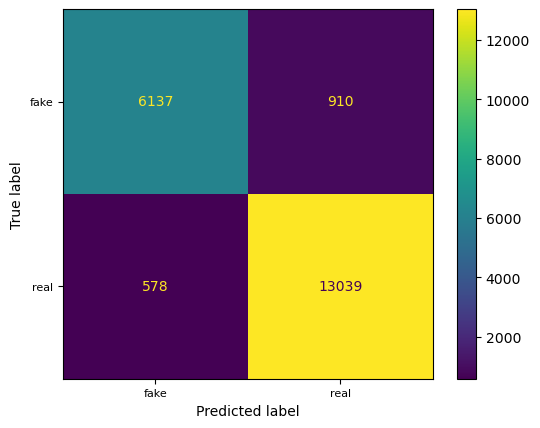

In [117]:
cm = confusion_matrix(y_test, y_pred_test_clf_rf, labels = rf_random_best.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [118]:
print(classification_report(y_test, y_pred_test_clf_rf))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7047
           1       0.93      0.96      0.95     13617

    accuracy                           0.93     20664
   macro avg       0.92      0.91      0.92     20664
weighted avg       0.93      0.93      0.93     20664



In [119]:
importances = rf_random_best.feature_importances_

In [125]:
rf_importances = pd.Series(importances, index = X_test_scaled.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [126]:
rf_importances.head(50)

TFIDF_said          0.092597
TFIDF_reuters       0.072212
TFIDF_featured      0.045571
TFIDF_image         0.040396
TFIDF_com           0.016159
TFIDF_hillary       0.014674
TFIDF_just          0.014212
TFIDF_tuesday       0.011694
dc_score            0.011116
TFIDF_thursday      0.011088
TFIDF_watch         0.009549
TFIDF_minister      0.009532
TFIDF_wednesday     0.009011
cl_score            0.008937
TFIDF_monday        0.008899
TFIDF_president     0.008817
dw_score            0.008661
TFIDF_friday        0.008484
TFIDF_fact          0.008231
char_count          0.008071
TFIDF_read          0.007804
letter_count        0.007786
syllable_count      0.007687
word_count          0.007668
monosyllab_count    0.007451
TFIDF_video         0.007303
fe_score            0.006919
ari_score           0.006654
gf_score            0.006472
TFIDF_mr            0.006252
TFIDF_know          0.006242
TFIDF_like          0.006186
TFIDF_donald        0.006143
sentence_count      0.006004
polysyllab_cou

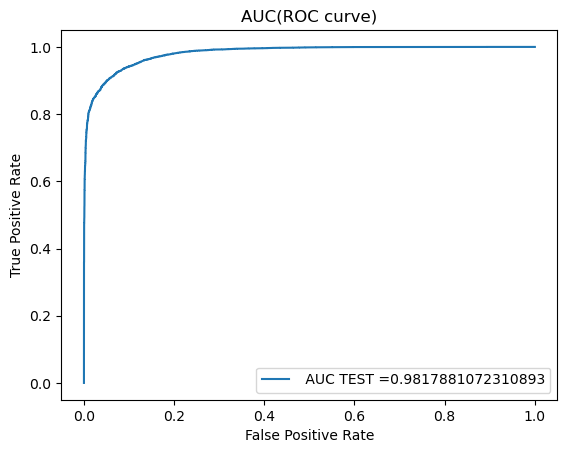

In [215]:
y_pred_proba_rf = rf_random_best.predict_proba(X_test_scaled)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=" AUC TEST ="+str(auc(fpr_rf, tpr_rf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [59]:
svm=LinearSVC()
svm.fit(X_train_scaled, y_train)
print("score on test: " + str(svm.score(X_test_scaled, y_test)))
print("score on train: "+ str(svm.score(X_train_scaled, y_train)))

score on test: 0.9126984126984127
score on train: 0.9221971285691241


In [92]:
param_grid = { 
    "C": np.logspace(0,5,7),
    "penalty":['l1','l2'],
    "loss": ['hinge', 'squared_hinge'],
    "dual": [False],
    "random_state": [1701]
    }

In [93]:
clf_svm = GridSearchCV(estimator=svm, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=3)



In [94]:
clf_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 6.81292069e+00, 4.64158883e+01, 3.16227766e+02,
       2.15443469e+03, 1.46779927e+04, 1.00000000e+05]),
                         'dual': [False], 'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2'], 'random_state': [1701]},
             refit='accuracy', scoring='accuracy')

In [95]:
clf_svm.best_params_

{'C': 14677.992676220705,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'random_state': 1701}

In [102]:
best_params = {
    'C': 14677.992676220705,
     'dual': False,
     'loss': 'squared_hinge',
     'penalty': 'l2',
     'random_state': 1701}


In [106]:
clf_svm_best = LinearSVC(C = 14677.992676220705, dual = False, loss = 'squared_hinge', penalty = 'l2', random_state = 1701)

In [111]:
clf_svm_best.fit(X_train_scaled, y_train)

LinearSVC(C=14677.992676220705, dual=False, random_state=1701)

In [112]:
print("score on test: " + str(clf_svm_best.score(X_test_scaled, y_test)))
print("score on train: "+ str(clf_svm_best.score(X_train_scaled, y_train)))

score on test: 0.9242644212156407
score on train: 0.9317147927085013


In [127]:
y_pred_test_clf_svm = clf_svm_best.predict(X_test_scaled)
y_pred_train_clf_svm = clf_svm_best.predict(X_train_scaled)

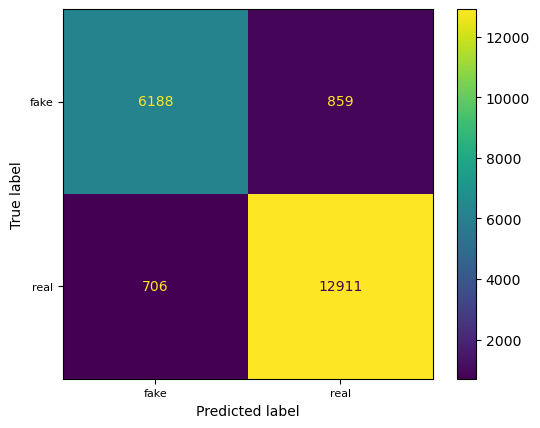

In [130]:
cm = confusion_matrix(y_test, y_pred_test_clf_svm, labels = rf_random_best.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [131]:
print(classification_report(y_test, y_pred_test_clf_svm))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7047
           1       0.94      0.95      0.94     13617

    accuracy                           0.92     20664
   macro avg       0.92      0.91      0.92     20664
weighted avg       0.92      0.92      0.92     20664



In [210]:
fpr_svm, tpr_svm, te_thresholds = roc_curve(y_test, y_pred_test_clf_svm)

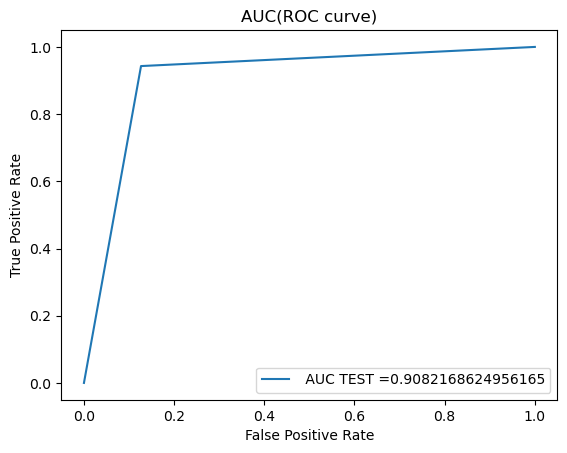

In [213]:


plt.plot(fpr_svm, tpr_svm, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [114]:
evc=VotingClassifier(estimators=[('clf_lr',clf_lr),('rf_random_best',rf_random_best),('clf_svm',clf_svm_best)],voting='hard')
evc.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('clf_lr',
                              LogisticRegression(C=1000, solver='newton-cg')),
                             ('rf_random_best',
                              RandomForestClassifier(bootstrap=False,
                                                     criterion='entropy',
                                                     max_depth=50,
                                                     max_features='auto',
                                                     n_estimators=1600,
                                                     random_state=1701)),
                             ('clf_svm',
                              LinearSVC(C=14677.992676220705, dual=False,
                                        random_state=1701))])

In [115]:
print("score on test: " + str(evc.score(X_test_scaled, y_test)))
print("score on train: "+ str(evc.score(X_train_scaled, y_train)))

score on test: 0.9253774680603949
score on train: 0.9341668010969512


In [144]:
y_pred_test_clf_evc = clf_svm_best.predict(X_test_scaled)
y_pred_train_clf_evc = clf_svm_best.predict(X_train_scaled)

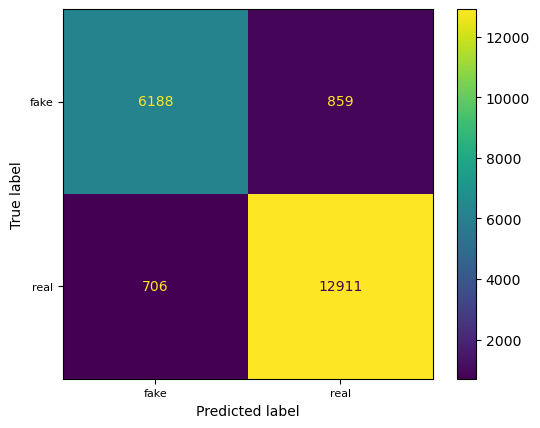

In [147]:
cm = confusion_matrix(y_test, y_pred_test_clf_evc, labels = rf_random_best.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [148]:
print(classification_report(y_test, y_pred_test_clf_evc))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7047
           1       0.94      0.95      0.94     13617

    accuracy                           0.92     20664
   macro avg       0.92      0.91      0.92     20664
weighted avg       0.92      0.92      0.92     20664



In [158]:
column_names = [
    'fe_score', 
    'fk_score',
    'cl_score',
    'ari_score',
    'dc_score',
    'dw_score',
    'ls_score',
    'gf_score',
    'syllable_count',
    'word_count',
    'sentence_count',
    'char_count',
    'letter_count',
    'polysyllab_count',
    'monosyllab_count',
    'std_score_num'
    ]

In [162]:
X_train_svm = X_train_scaled.drop(column_names, axis = 1)
X_train_svm.head()

,TFIDF_able,TFIDF_access,TFIDF_according,TFIDF_account,TFIDF_accused,TFIDF_act,TFIDF_action,TFIDF_actually,TFIDF_added,TFIDF_administration,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,-0.256757,-0.201669,-0.428621,-0.197891,2.256519,-0.277561,-0.301950,-0.259174,1.748248,-0.355915,...,-0.291893,-0.253529,1.034505,-0.186961,-0.287631,0.783464,-0.254653,0.024086,1.222872,-0.203004
1,2.427480,-0.201669,-0.428621,-0.197891,-0.237345,-0.277561,-0.301950,-0.259174,-0.333809,-0.355915,...,1.829911,2.168789,2.548196,-0.186961,1.968665,0.826040,-0.254653,-0.667435,-0.307607,-0.203004
2,-0.256757,-0.201669,4.241762,1.700996,1.813589,1.289647,-0.301950,-0.259174,-0.333809,-0.355915,...,-0.291893,-0.253529,-0.375700,1.394514,-0.287631,-0.376894,-0.254653,-0.098733,4.727008,-0.203004
3,-0.256757,-0.201669,-0.428621,-0.197891,-0.237345,-0.277561,-0.301950,-0.259174,-0.333809,-0.355915,...,-0.291893,0.961914,0.357859,-0.186961,-0.287631,-0.376894,-0.254653,1.850568,-0.307607,-0.203004
4,-0.256757,-0.201669,-0.428621,-0.197891,3.547321,-0.277561,1.054954,-0.259174,-0.333809,-0.355915,...,1.261139,-0.253529,0.694357,-0.186961,-0.287631,0.503581,-0.254653,-0.142712,-0.307607,-0.203004


In [163]:
X_test_svm = X_test_scaled.drop(column_names, axis = 1)
X_test_svm.head()

,TFIDF_able,TFIDF_access,TFIDF_according,TFIDF_account,TFIDF_accused,TFIDF_act,TFIDF_action,TFIDF_actually,TFIDF_added,TFIDF_administration,...,TFIDF_won,TFIDF_word,TFIDF_work,TFIDF_worker,TFIDF_working,TFIDF_world,TFIDF_wrote,TFIDF_year,TFIDF_york,TFIDF_young
0,-0.256757,-0.201669,-0.428621,-0.197891,-0.237345,-0.277561,-0.30195,-0.259174,1.113381,1.356563,...,-0.291893,-0.253529,0.604501,-0.186961,-0.287631,-0.376894,-0.254653,0.293886,-0.307607,-0.203004
1,-0.256757,-0.201669,-0.428621,-0.197891,-0.237345,-0.277561,-0.30195,-0.259174,0.689231,-0.355915,...,1.719448,-0.253529,-0.375700,-0.186961,-0.287631,7.035112,-0.254653,-0.667435,-0.307607,-0.203004
2,-0.256757,-0.201669,-0.428621,-0.197891,-0.237345,-0.277561,-0.30195,-0.259174,-0.333809,-0.355915,...,-0.291893,-0.253529,-0.375700,-0.186961,-0.287631,-0.376894,-0.254653,-0.667435,-0.307607,-0.203004
3,-0.256757,-0.201669,-0.428621,-0.197891,-0.237345,-0.277561,-0.30195,1.907317,-0.333809,-0.355915,...,-0.291893,-0.253529,2.055899,-0.186961,-0.287631,2.624295,1.735487,3.505898,-0.307607,4.063572
4,-0.256757,-0.201669,-0.428621,-0.197891,-0.237345,-0.277561,-0.30195,-0.259174,-0.333809,0.375334,...,-0.291893,-0.253529,-0.375700,-0.186961,1.004329,-0.376894,1.115618,-0.667435,-0.307607,-0.203004


In [167]:
param_grid_svm_no_rc = { 
    "C": np.logspace(0,5,7),
    "penalty":['l1','l2'],
    "loss": ['hinge', 'squared_hinge'],
    "dual": [False],
    "random_state": [1701]
    }

In [170]:
clf_svm_no_rc = GridSearchCV(estimator=svm, 
                           param_grid=param_grid_svm_no_rc, 
                           scoring='accuracy', 
                           refit='accuracy',  
                           cv=3)



In [171]:
clf_svm_no_rc.fit(X_train_svm, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': array([1.00000000e+00, 6.81292069e+00, 4.64158883e+01, 3.16227766e+02,
       2.15443469e+03, 1.46779927e+04, 1.00000000e+05]),
                         'dual': [False], 'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2'], 'random_state': [1701]},
             refit='accuracy', scoring='accuracy')

In [173]:
print("score on test: " + str(clf_svm_no_rc.score(X_test_svm, y_test)))
print("score on train: "+ str(clf_svm_no_rc.score(X_train_svm, y_train)))

score on test: 0.9192799070847851
score on train: 0.9254879819325698


In [174]:
clf_svm_no_rc.best_params_

{'C': 1.0,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l1',
 'random_state': 1701}

In [176]:
y_pred_test_clf_svm = clf_svm_no_rc.predict(X_test_svm)
y_pred_train_clf_svm = clf_svm_no_rc.predict(X_train_svm)

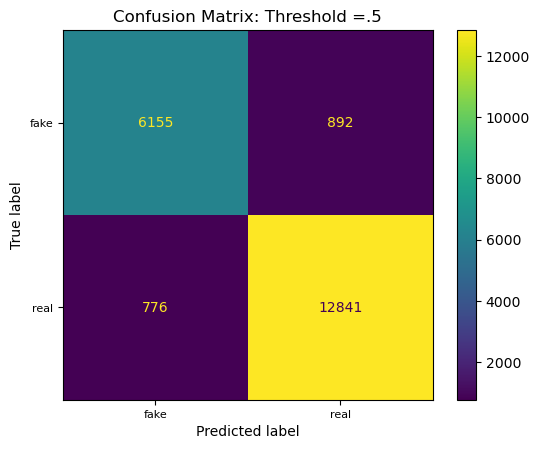

In [260]:
cm = confusion_matrix(y_test, y_pred_test_clf_svm, labels = rf_random_best.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_title('Confusion Matrix: Threshold =.5')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [178]:
print(classification_report(y_test, y_pred_test_clf_svm))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7047
           1       0.94      0.94      0.94     13617

    accuracy                           0.92     20664
   macro avg       0.91      0.91      0.91     20664
weighted avg       0.92      0.92      0.92     20664



In [179]:
X_train_rc = X_train[column_names]
X_train_rc.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,std_score_num
0,65.73,7.6,9.10,8.5,9.41,166,7.375000,8.91,1140,786,56,3831,3656,83,542,8.5
1,48.27,14.3,12.37,18.6,9.88,113,21.666667,15.97,869,561,18,2914,2813,75,363,14.5
2,56.59,11.1,10.80,13.3,8.72,128,20.333333,12.62,1111,737,32,3624,3527,104,491,12.5
3,78.79,6.7,5.80,7.2,6.68,103,7.666667,8.35,1445,1141,64,4777,4603,48,905,6.5
4,47.22,12.6,12.89,15.5,9.10,163,16.250000,13.33,1304,838,35,4445,4313,115,538,12.5


In [182]:
X_test_rc = X_test[column_names]
X_test_rc.head()

,fe_score,fk_score,cl_score,ari_score,dc_score,dw_score,ls_score,gf_score,syllable_count,word_count,sentence_count,char_count,letter_count,polysyllab_count,monosyllab_count,std_score_num
0,69.11,8.3,9.28,10.5,8.55,89,8.166667,10.38,759,533,28,2532,2440,60,380,8.5
1,63.73,10.4,10.33,13.6,8.61,213,13.750000,12.83,1908,1338,55,6505,6308,137,946,13.5
2,55.44,9.5,14.38,13.3,12.44,18,11.250000,12.67,103,63,4,360,347,13,39,12.5
3,57.71,10.7,10.56,13.0,8.98,287,14.000000,11.81,2252,1508,69,7529,7234,168,994,10.5
4,41.33,14.9,13.47,18.5,9.98,204,36.000000,16.68,1469,892,30,4745,4638,168,548,16.5


In [ ]:
'''Honestly I should expect a somewhat lower performance as the model was optimized for more features
'''

In [181]:
clf_svm_rc = GridSearchCV(estimator=svm, 
                           param_grid=param_grid_svm_no_rc, 
                           scoring='accuracy', 
                           refit='accuracy',  
                           cv=3)


In [184]:
clf_svm_rc.fit(X_train_rc, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': array([1.00000000e+00, 6.81292069e+00, 4.64158883e+01, 3.16227766e+02,
       2.15443469e+03, 1.46779927e+04, 1.00000000e+05]),
                         'dual': [False], 'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2'], 'random_state': [1701]},
             refit='accuracy', scoring='accuracy')

In [186]:
clf_svm_rc.best_params_

{'C': 46.4158883361278,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'random_state': 1701}

In [ ]:
'''I should expect this to be significantly worse as Linear SVC is better with more features'''

In [188]:
print("score on test: " + str(clf_svm_rc.score(X_test_rc, y_test)))
print("score on train: "+ str(clf_svm_rc.score(X_train_rc, y_train)))

score on test: 0.7243031358885017
score on train: 0.7265365381513147


In [ ]:
'''as expected'''

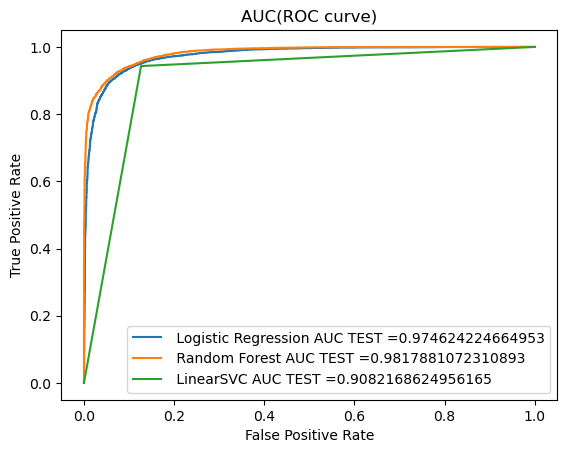

In [218]:
plt.plot(fpr_lr, tpr_lr, label=" Logistic Regression AUC TEST ="+str(auc(fpr_lr, tpr_lr)))
plt.plot(fpr_rf, tpr_rf, label=" Random Forest AUC TEST ="+str(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_svm, tpr_svm, label=" LinearSVC AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [243]:
y_pred_thresh = (rf_random_best.predict_proba(X_test_scaled)[:, 1] > .35).astype('float')


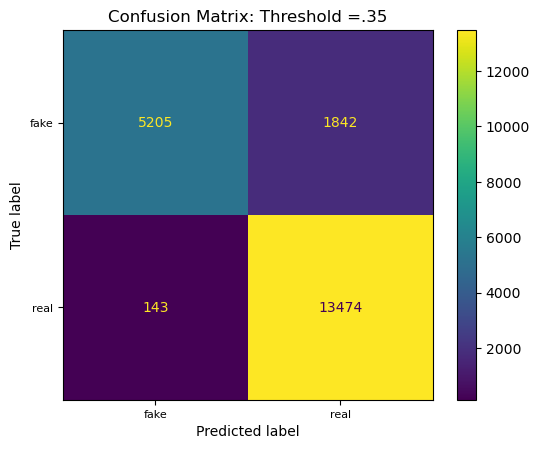

In [259]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = rf_random_best.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['fake', 'real'])
ax.set_title('Confusion Matrix: Threshold =.35')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['fake', 'real'], fontsize = 8)
ax.set_yticklabels(labels = ['fake', 'real'], fontsize = 8)
display_cm.plot(ax = ax)

In [274]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      7047
           1       0.88      0.99      0.93     13617

    accuracy                           0.90     20664
   macro avg       0.93      0.86      0.89     20664
weighted avg       0.91      0.90      0.90     20664



In [232]:
sum(y_test)

13617

In [233]:
len(y_test)

20664

In [234]:
len(y_test)-sum(y_test)

7047

In [235]:
7047/13617

0.5175148711169861

In [236]:
7047/20664

0.34102787456445993

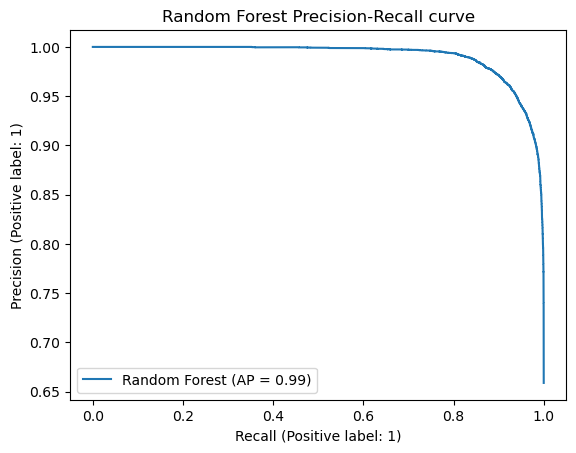

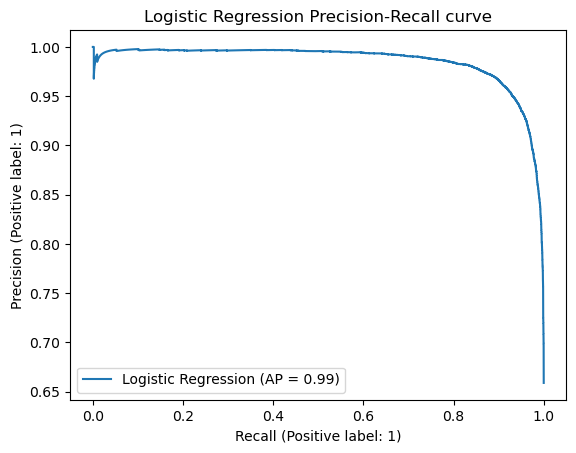

In [257]:
display_rf = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_rf, name = 'Random Forest')
display_lr = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_lr, name = 'Logistic Regression')

_ = display_rf.ax_.set_title("Random Forest Precision-Recall curve")
_ = display_lr.ax_.set_title("Logistic Regression Precision-Recall curve")